In [4]:
from keras.datasets import imdb
#train_data and test_data are lists of reviews; each review is a list of word indices. train_labels and test_labels are lists of 0's and 1s where 0 is negative and 1 is positive
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #num_words=10000 will only keep the top 10000 most frequently occuring words in training data


Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [5]:
#train_data and test_data are lists of reviews; each review is a list of word indices.
#train_labels and test_labels are lists of 0's and 1s where 0 is negative and 1 
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
#train_labels and test_labels are lists of 0's and 1s where 0 is negative and 1 
train_labels[0]

1

In [7]:
#Because you’re restricting yourself to the top 10,000 most frequent words, no word
#index will exceed 10,000
max([max(sequence) for sequence in train_data])

9999

In [8]:
# quickly decode one of these reviews back to English words
word_index = imdb.get_word_index() #word_index is a dictionary mapping words to an integer index
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])#Reverses it, mapping integer indices to words
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]]) #Decodes the review.

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #Creates an all-zero matrix of shape (len(sequences),dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1              #Sets specific indices of results[i] to 1s
    return results
x_train = vectorize_sequences(train_data) #Vectorized training data
x_test = vectorize_sequences(test_data)   #Vectorized test data


In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [18]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 295us/step - loss: 0.0093 - acc: 0.9975 - val_loss: 0.7186 - val_acc: 0.8678
Epoch 2/20
15000/15000 [==============================] - 4s 274us/step - loss: 0.0057 - acc: 0.9991 - val_loss: 0.7619 - val_acc: 0.8644
Epoch 3/20
15000/15000 [==============================] - 4s 259us/step - loss: 0.0023 - acc: 0.9999 - val_loss: 0.7797 - val_acc: 0.8644
Epoch 4/20
15000/15000 [==============================] - 4s 260us/step - loss: 0.0018 - acc: 0.9999 - val_loss: 0.8261 - val_acc: 0.8623
Epoch 5/20
15000/15000 [==============================] - 4s 290us/step - loss: 0.0053 - acc: 0.9989 - val_loss: 0.8621 - val_acc: 0.8625
Epoch 6/20
15000/15000 [==============================] - 4s 288us/step - loss: 9.6665e-04 - acc: 1.0000 - val_loss: 0.8866 - val_acc: 0.8617
Epoch 7/20
15000/15000 [==============================] - 5s 317us/step - loss: 0.0042 - acc: 0.9989 - val_loss: 0.928

ValueError: x and y must have same first dimension, but have shapes (3,) and (20,)

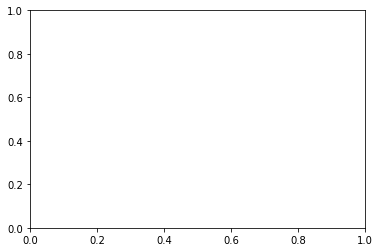

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
